


# SHORTEST JOB FIRST (NON-PREEMPTIVE) SJF




In [2]:

def processData( no_of_processes,pl):
    process_data = []
    for i in range(no_of_processes):
        temporary = []
        process_id =(i+1)
        arrival_time = int(input(f"Enter Arrival Time for Process {process_id}: "))
        burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))
        temporary.extend([process_id, arrival_time, burst_time, 0])
        '''
        '0' is the state of the process. 0 means not executed and 1 means execution complete
        '''
        process_data.append(temporary)
    schedulingProcess( process_data,pl)




def calculateTurnaroundTime( process_data):
    total_turnaround_time = 0
    for i in range(len(process_data)):
        turnaround_time = process_data[i][4] - process_data[i][1]
        '''
        turnaround_time = completion_time - arrival_time
        '''
        total_turnaround_time = total_turnaround_time + turnaround_time
        process_data[i].append(turnaround_time)
    average_turnaround_time = total_turnaround_time / len(process_data)
    '''
    average_turnaround_time = total_turnaround_time / no_of_processes
    '''
    return average_turnaround_time


def calculateWaitingTime( process_data):
    total_waiting_time = 0
    for i in range(len(process_data)):
        waiting_time = process_data[i][5] - process_data[i][2]
        '''
        waiting_time = turnaround_time - burst_time
        '''
        total_waiting_time = total_waiting_time + waiting_time
        process_data[i].append(waiting_time)
    average_waiting_time = total_waiting_time / len(process_data)
    '''
    average_waiting_time = total_waiting_time / no_of_processes
    '''
    return average_waiting_time


def printData( process_data, average_turnaround_time, average_waiting_time):
    process_data.sort(key=lambda x: x[0])
    '''
    Sort processes according to the Process ID
    '''
    print("Process_ID  Arrival_Time  Burst_Time      Completed  Completion_Time  Turnaround_Time  Waiting_Time")
    for i in range(len(process_data)):
        for j in range(len(process_data[i])):

            print(process_data[i][j], end="		")
        print()
    print(f'Average Turnaround Time: {average_turnaround_time}')

    print(f'Average Waiting Time: {average_waiting_time}')



In [3]:
def schedulingProcess( process_data,pl):
    start_time = []
    exit_time = []
    
    s_time = 0
    process_data.sort(key=lambda x: x[1])

    '''
    Sort processes according to the Arrival Time
    '''
    for i in range(len(process_data)):
        ready_queue = []
        temp = []
        normal_queue = []
        # print(i)
        for j in range(len(process_data)):
            if (process_data[j][1] <= s_time) and (process_data[j][3] == 0):
                temp.extend([process_data[j][0], process_data[j][1], process_data[j][2]])
                ready_queue.append(temp)
                temp = []
            elif process_data[j][3] == 0:
                temp.extend([process_data[j][0], process_data[j][1], process_data[j][2]])
                normal_queue.append(temp)
                temp = []
        if len(ready_queue) != 0:
            ready_queue.sort(key=lambda x: x[2])
            '''
            Sort the processes according to the Burst Time
            '''           
            ab=s_time
            start_time.append(s_time)
            s_time = s_time + ready_queue[0][2]
            e_time = s_time
            pl.append({i:(ab,e_time-ab)})
            exit_time.append(e_time)
            print(start_time)
            print(exit_time)
            for k in range(len(process_data)):
                if process_data[k][0] == ready_queue[0][0]:
                    break
            process_data[k][3] = 1
            process_data[k].append(e_time)

        elif len(ready_queue) == 0:
            if s_time < normal_queue[0][1]:
                s_time = normal_queue[0][1]
            ab = s_time
            start_time.append(s_time)
            s_time = s_time + normal_queue[0][2]
            e_time = s_time
            pl.append({i:(ab,e_time-ab)})
            exit_time.append(e_time)
            for k in range(len(process_data)):
                if process_data[k][0] == normal_queue[0][0]:
                    break
            process_data[k][3] = 1
            process_data[k].append(e_time)
    print(pl)
    t_time = calculateTurnaroundTime( process_data)
    w_time = calculateWaitingTime( process_data)
    printData( process_data, t_time, w_time)

if __name__ == "__main__":
    no_of_processes = int(input("Enter number of processes: "))
    plotgraph=[]
    processData(no_of_processes,plotgraph)

Enter number of processes: 5
Enter Arrival Time for Process 1: 2
Enter Burst Time for Process 1: 5
Enter Arrival Time for Process 2: 1
Enter Burst Time for Process 2: 7
Enter Arrival Time for Process 3: 4
Enter Burst Time for Process 3: 6
Enter Arrival Time for Process 4: 4
Enter Burst Time for Process 4: 2
Enter Arrival Time for Process 5: 8
Enter Burst Time for Process 5: 4
[1, 8]
[8, 10]
[1, 8, 10]
[8, 10, 14]
[1, 8, 10, 14]
[8, 10, 14, 19]
[1, 8, 10, 14, 19]
[8, 10, 14, 19, 25]
[{0: (1, 7)}, {1: (8, 2)}, {2: (10, 4)}, {3: (14, 5)}, {4: (19, 6)}]
Process_ID  Arrival_Time  Burst_Time      Completed  Completion_Time  Turnaround_Time  Waiting_Time
1		2		5		1		19		17		12		
2		1		7		1		8		7		0		
3		4		6		1		25		21		15		
4		4		2		1		10		6		4		
5		8		4		1		14		6		2		
Average Turnaround Time: 11.4
Average Waiting Time: 6.6


[{0: (1, 7)}, {1: (8, 2)}, {2: (10, 4)}, {3: (14, 5)}, {4: (19, 6)}]
[(1, 7)]
SAsaas
SAsaas
0
[(8, 2)]
SAsaas
SAsaas
1
[(10, 4)]
SAsaas
SAsaas
2
[(14, 5)]
SAsaas
SAsaas
3
[(19, 6)]
SAsaas
SAsaas
4


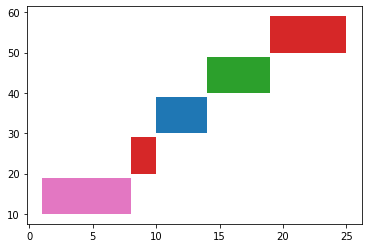

In [22]:
import matplotlib.pyplot as plt 
from collections import defaultdict
dd = defaultdict(list)
for d in (plotgraph): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value) 
fig,ax = plt.subplots()

color =['tab:pink','tab:red','tab:blue','tab:green','tab:red','tab:black','tab:purple','tab:pink','tab:red','tab:blue','tab:green','tab:yellow','tab:black','tab:purple','tab:pink','tab:red','tab:blue','tab:green','tab:yellow','tab:black','tab:purple','tab:pink','tab:red','tab:blue','tab:green','tab:yellow','tab:black','tab:purple']
print(plotgraph)

for a in dd:
  print(dd[a])
  print("SAsaas")
  dd[a]
  print("SAsaas")

  print(a)
  c=(a+1)*10
  ax.broken_barh(dd[a], (c, 9), facecolors =(color[a]))



# SHORTEST JOB FIRST (PREEMPTIVE) also known as SRTF


In [9]:

def processData( no_of_processes,pl):
    process_data = []
    for i in range(no_of_processes):
        temporary = []
        process_id = (i+1)
        arrival_time = int(input(f"Enter Arrival Time for Process {process_id}: "))
        burst_time = int(input(f"Enter Burst Time for Process {process_id}: "))
        temporary.extend([process_id, arrival_time, burst_time, 0, burst_time])
        '''
        '0' is the state of the process. 0 means not executed and 1 means execution complete
        '''
        process_data.append(temporary)
    schedulingProcess( process_data,pl)


def calculateTurnaroundTime( process_data):
    total_turnaround_time = 0
    for i in range(len(process_data)):
        turnaround_time = process_data[i][5] - process_data[i][1]
        '''
        turnaround_time = completion_time - arrival_time
        '''
        total_turnaround_time = total_turnaround_time + turnaround_time
        process_data[i].append(turnaround_time)
    average_turnaround_time = total_turnaround_time / len(process_data)
    '''
    average_turnaround_time = total_turnaround_time / no_of_processes
    '''
    return average_turnaround_time

def calculateWaitingTime( process_data):
    total_waiting_time = 0
    for i in range(len(process_data)):
        waiting_time = process_data[i][6] - process_data[i][4]
        '''
        waiting_time = turnaround_time - burst_time
        '''
        total_waiting_time = total_waiting_time + waiting_time
        process_data[i].append(waiting_time)
    average_waiting_time = total_waiting_time / len(process_data)
    '''
    average_waiting_time = total_waiting_time / no_of_processes
    '''
    return average_waiting_time

def printData( process_data, average_turnaround_time, average_waiting_time, sequence_of_process):
    process_data.sort(key=lambda x: x[0])
    '''
    Sort processes according to the Process ID
    '''
    print("Process_ID  Arrival_Time  Rem_Burst_Time      Completed  Orig_Burst_Time Completion_Time  Turnaround_Time  Waiting_Time")
    for i in range(len(process_data)):
        for j in range(len(process_data[i])):
            print(process_data[i][j], end="\t\t")
        print()
    print(f'Average Turnaround Time: {average_turnaround_time}')
    print(f'Average Waiting Time: {average_waiting_time}')
    print(f'Sequence of Process: {sequence_of_process}')



In [18]:
def schedulingProcess( process_data,pl):
    start_time = []
    exit_time = []
    s_time = 0
    sequence_of_process = []
    process_data.sort(key=lambda x: x[1])
    '''
    Sort processes according to the Arrival Time
    '''
    while 1:
        ready_queue = []
        normal_queue = []
        temp = []
        for i in range(len(process_data)):
            if process_data[i][1] <= s_time and process_data[i][3] == 0:
                temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                ready_queue.append(temp)
                temp = []
            elif process_data[i][3] == 0:
                temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                normal_queue.append(temp)
                temp = []
        if len(ready_queue) == 0 and len(normal_queue) == 0:
            break
        if len(ready_queue) != 0:
            ready_queue.sort(key=lambda x: x[2])
            '''
            Sort processes according to Burst Time
            '''
            start_time.append(s_time)
            ab = s_time

            s_time = s_time + 1
            e_time = s_time 
            cc = e_time-ab
            # print("dsdsdssdds")
            # print(ab)
            # print(e_time)
            # print(cc)
            pl.append({ready_queue[0][0]:(ab,cc)})
            # print(pl)

            exit_time.append(e_time)
            sequence_of_process.append(ready_queue[0][0])
            for k in range(len(process_data)):
                if process_data[k][0] == ready_queue[0][0]:
                    break
            process_data[k][2] = process_data[k][2] - 1
            if process_data[k][2] == 0:        #If Burst Time of a process is 0, it means the process is completed
                process_data[k][3] = 1
                process_data[k].append(e_time)
        if len(ready_queue) == 0:
            if s_time < normal_queue[0][1]:
                s_time = normal_queue[0][1]
            start_time.append(s_time)
            ab = s_time
            s_time = s_time + 1
            e_time = s_time
            cc=e_time-ab
            
            pl.append({normal_queue[0][0]:(ab,cc)})
            # print(pl)

            # print(ab)
            # print(e_time)
            # print(cc)
            exit_time.append(e_time)
            sequence_of_process.append(normal_queue[0][0])
            for k in range(len(process_data)):
                if process_data[k][0] == normal_queue[0][0]:
                    break
            process_data[k][2] = process_data[k][2] - 1
            if process_data[k][2] == 0:        #If Burst Time of a process is 0, it means the process is completed
                process_data[k][3] = 1
                process_data[k].append(e_time)
    t_time = calculateTurnaroundTime( process_data)
    w_time = calculateWaitingTime( process_data)
    printData( process_data, t_time, w_time, sequence_of_process)


if __name__ == "__main__":
    no_of_processes = int(input("Enter number of processes: "))
    plotgraph1 = []

    processData(no_of_processes,plotgraph1)
2

Enter number of processes: 9
Enter Arrival Time for Process 1: 5
Enter Burst Time for Process 1: 2
Enter Arrival Time for Process 2: 2
Enter Burst Time for Process 2: 5
Enter Arrival Time for Process 3: 2
Enter Burst Time for Process 3: 8
Enter Arrival Time for Process 4: 2
Enter Burst Time for Process 4: 5
Enter Arrival Time for Process 5: 4
Enter Burst Time for Process 5: 6
Enter Arrival Time for Process 6: 3
Enter Burst Time for Process 6: 9
Enter Arrival Time for Process 7: 0
Enter Burst Time for Process 7: 4
Enter Arrival Time for Process 8: 1
Enter Burst Time for Process 8: 9
Enter Arrival Time for Process 9: 4
Enter Burst Time for Process 9: 9
Process_ID  Arrival_Time  Rem_Burst_Time      Completed  Orig_Burst_Time Completion_Time  Turnaround_Time  Waiting_Time
1		5		0		1		2		7		2		0		
2		2		0		1		5		11		9		4		
3		2		0		1		8		30		28		20		
4		2		0		1		5		16		14		9		
5		4		0		1		6		22		18		12		
6		3		0		1		9		48		45		36		
7		0		0		1		4		4		4		0		
8		1		0		1		9		39		38		29		
9		4		

2

[{7: (0, 1)}, {7: (1, 1)}, {7: (2, 1)}, {7: (3, 1)}, {2: (4, 1)}, {1: (5, 1)}, {1: (6, 1)}, {2: (7, 1)}, {2: (8, 1)}, {2: (9, 1)}, {2: (10, 1)}, {4: (11, 1)}, {4: (12, 1)}, {4: (13, 1)}, {4: (14, 1)}, {4: (15, 1)}, {5: (16, 1)}, {5: (17, 1)}, {5: (18, 1)}, {5: (19, 1)}, {5: (20, 1)}, {5: (21, 1)}, {3: (22, 1)}, {3: (23, 1)}, {3: (24, 1)}, {3: (25, 1)}, {3: (26, 1)}, {3: (27, 1)}, {3: (28, 1)}, {3: (29, 1)}, {8: (30, 1)}, {8: (31, 1)}, {8: (32, 1)}, {8: (33, 1)}, {8: (34, 1)}, {8: (35, 1)}, {8: (36, 1)}, {8: (37, 1)}, {8: (38, 1)}, {6: (39, 1)}, {6: (40, 1)}, {6: (41, 1)}, {6: (42, 1)}, {6: (43, 1)}, {6: (44, 1)}, {6: (45, 1)}, {6: (46, 1)}, {6: (47, 1)}, {9: (48, 1)}, {9: (49, 1)}, {9: (50, 1)}, {9: (51, 1)}, {9: (52, 1)}, {9: (53, 1)}, {9: (54, 1)}, {9: (55, 1)}, {9: (56, 1)}]
defaultdict(<class 'list'>, {7: [(0, 1), (1, 1), (2, 1), (3, 1)], 2: [(4, 1), (7, 1), (8, 1), (9, 1), (10, 1)], 1: [(5, 1), (6, 1)], 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], 5: [(16, 1), (17, 1), (18, 1

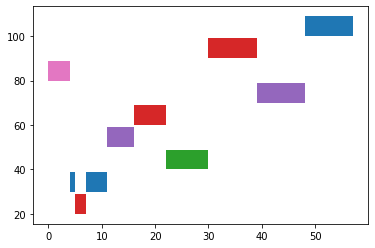

In [21]:
import matplotlib.pyplot as plt 
from collections import defaultdict
dd = defaultdict(list)
for d in (plotgraph1): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)
fig,ax = plt.subplots()
color =['tab:pink','tab:red','tab:blue','tab:green','tab:purple','tab:red','tab:purple','tab:pink','tab:red','tab:blue','tab:green','tab:pink','tab:black','tab:purple','tab:pink','tab:red','tab:blue','tab:green','tab:yellow','tab:black','tab:purple','tab:pink','tab:red','tab:blue','tab:green','tab:yellow','tab:black','tab:purple']
print(plotgraph1)
print(dd)
for key in dd:
  # print(n)
  key = int(key)
  # print(dd[key])
  type(dd[key])
  c=(key+1)*10
  ax.broken_barh(dd[key], (c, 9), facecolors =(color[key]))
  # print(key)